# Weekly Dataset of 2019

In [45]:
# Dependency
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import pandas as pd

In [46]:
# Load Data
data = pd.read_csv("WeeklyDataset2019.csv")

In [20]:
data.head()

,Week,Tweets,DJ%Change,SP%Change,STDTweets,STDDJ,STDSP
0,12/28/2018 - 1/3/2019,61,-0.0077,-0.007,-1.22,-0.810147,-0.815278
1,1/4/2019 - 1/10/2019,66,0.0399,0.042,-1.15,2.916764,3.209962
2,1/11/2019 - 1/17/2019,85,0.0219,0.025,-0.88,1.507428,1.813450
3,1/18/2019 - 1/24/2019,121,-0.0024,-0.003,-0.38,-0.395175,-0.486687
4,1/25/2019 - 1/31/2019,65,0.0111,0.018,-1.16,0.661826,1.238416


In [47]:
# Descriptive Stats
data.describe()

,Tweets,DJ%Change,SP%Change,STDTweets,STDDJ,STDSP
count,53.000000,53.000000,53.000000,53.000000,5.300000e+01,5.300000e+01
mean,148.056604,0.002647,0.002925,0.000755,7.547171e-11,-1.886792e-11
std,71.442934,0.012772,0.012173,1.000148,1.000000e+00,1.000000e+00
min,34.000000,-0.025200,-0.024000,-1.600000,-2.180334e+00,-2.211789e+00
25%,98.000000,-0.004900,-0.003000,-0.700000,-5.909165e-01,-4.866867e-01
50%,141.000000,0.003800,0.004000,-0.100000,9.026249e-02,8.834758e-02
75%,183.000000,0.011400,0.010000,0.490000,6.853154e-01,5.812341e-01
max,425.000000,0.039900,0.042000,3.880000,2.916764e+00,3.209962e+00


## Time series of Tweets vs DJ index change per week in 2019 

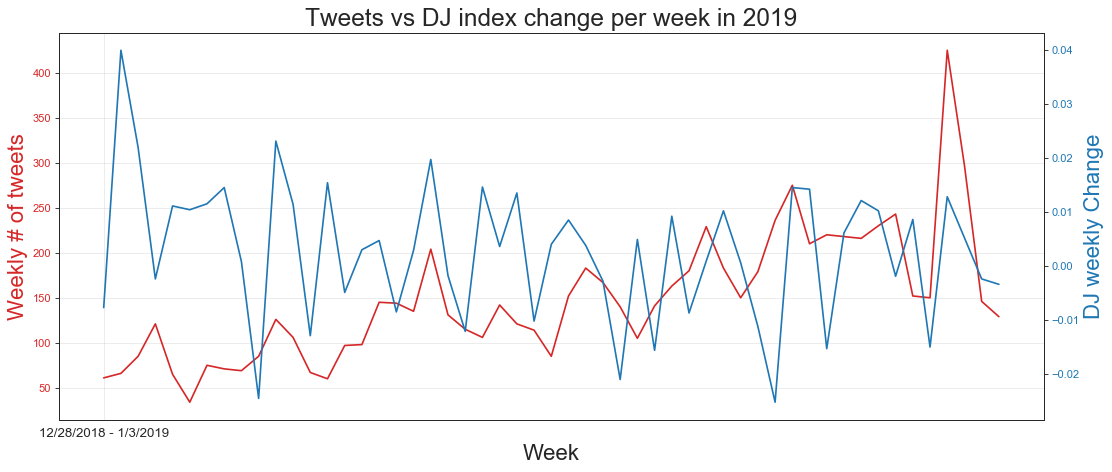

In [49]:
y=data["DJ%Change"]
x=data["Tweets"]
# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(14,6), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Dow Jones (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Week', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Weekly # of tweets', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("DJ weekly Change", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Tweets vs DJ index change per week in 2019", fontsize=22)
fig.tight_layout()
plt.show()

##  Scatterplot with line of best fit of DJ Index VS Tweets

Visual check for relationship.

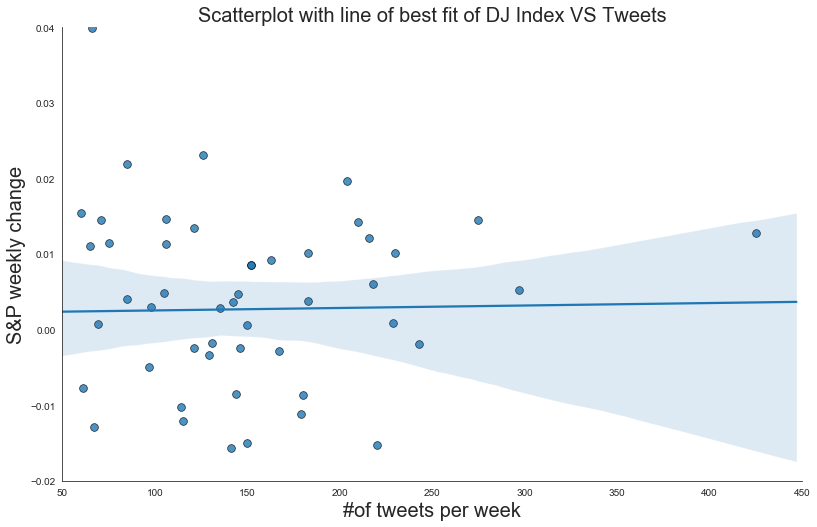

In [26]:
sns.set_style("white")
gridobj = sns.lmplot(x="Tweets", y="DJ%Change", data=data, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(50, 450), ylim=(-0.02, 0.04))
plt.xlabel("#of tweets per week", fontsize = 20)
plt.ylabel("S&P weekly change", fontsize = 20)
plt.title("Scatterplot with line of best fit of DJ Index VS Tweets", fontsize=20)
plt.show()

## Density Plot of Standardized Tweets,DJ and S&P Index per week

Visual check for dependency

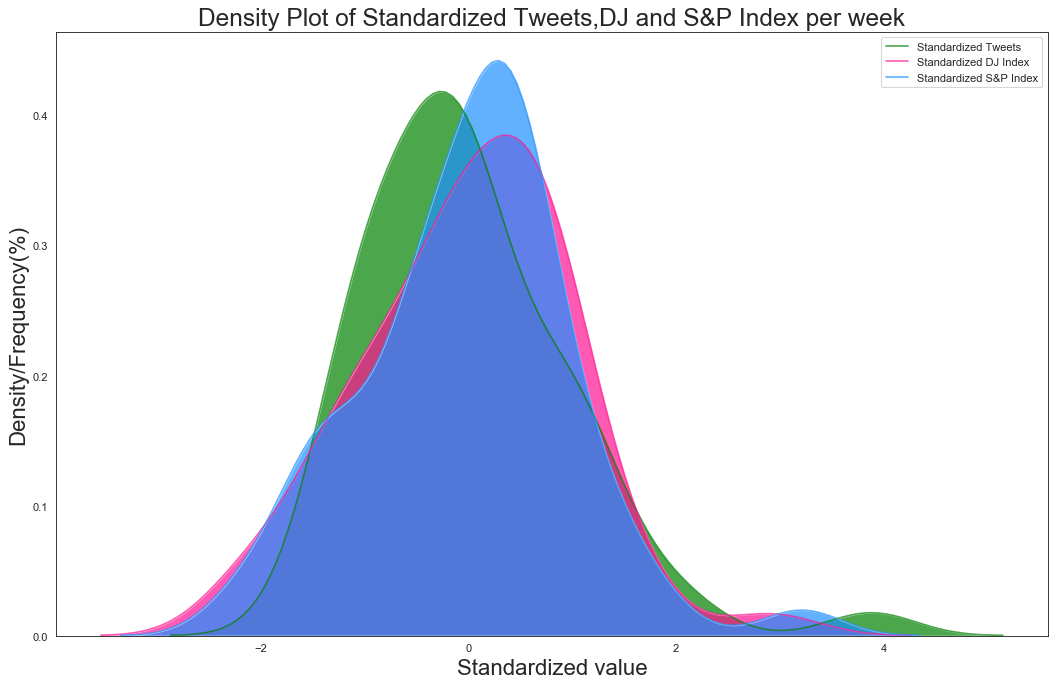

In [36]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(data["STDTweets"], shade=True, color="g", label="Standardized Tweets", alpha=.7)
sns.kdeplot(data["STDDJ"], shade=True, color="deeppink", label="Standardized DJ Index", alpha=.7)
sns.kdeplot(data["STDSP"], shade=True, color="dodgerblue", label="Standardized S&P Index", alpha=.7)


# Decoration
plt.title('Density Plot of Standardized Tweets,DJ and S&P Index per week', fontsize=22)
plt.xlabel("Standardized value", fontsize = 20)
plt.ylabel("Density/Frequency(%)", fontsize = 20)
plt.legend()
plt.show()

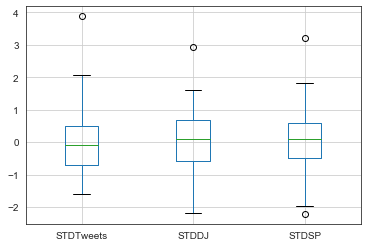

In [37]:
data.boxplot(column=["STDTweets","STDDJ","STDSP"],vert=True)

# Hypothesis testing

Testint whether **Tweets** and **Dow Jones or S&P500 index** have linear relationship using Pearson's Correlation Coefficient.

-  H0:Tweets and Dow Jones/S&P500 index are independent
-  H1:There is a dependency between Tweets and Dow Jones/S&P500 index.

In [43]:
# Hypothesis testing code for Dow Jones
from scipy.stats import pearsonr
data1 = data['STDTweets']
data2 = data['STDDJ']
r, p = pearsonr(data1, data2)
print('r=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Fail to reject H0:Tweets and Dow Jones index are independent')
else:
    print('Reject H0:Tweets and Dow Jones index are independent')

r=-0.027, p=0.849
Fail to reject H0:Tweets and Dow Jones index are independent


In [44]:
# Hypothesis testing code for S&P500
data3 = data['STDSP']
r, p = pearsonr(data1, data3)
print('r=%.3f, p=%.3f' % (r, p))
if p > 0.05:
    print('Fail to reject H0:Tweets and S&P500 index are independent')
else:
    print('Reject H0:Tweets and S&P500 index are independent')

r=-0.061, p=0.667
Fail to reject H0:Tweets and S&P500 index are independent


## Conclusion

Visually, we can see that the trend of the stock market and Trump’s tweets seem to move together. When running an hypothesis test of dependency between tweets vs stock index,Trump’s tweets do not  in fact move with the stock market.In other words, we have no indication of the relationship. There are many individual factors that may affect stock returns such as interest rates, inflation expectations, and other idiosyncratic factors. The interpretation of the relationship we have found is more likely that the tweets coincide with market-moving events such as a surprising economic data release or a monetary policy decision after markets have reacted to the data.